<center> <h2>Support Vector Machine's</h2> </center>
<center>by Harun Al Azies</center>

<p class="tulisan_kiri">[1] Tahap Pertama, impor library yang diperlukan.</p>

In [7]:
# [1] Tahap Pertama, impor library yang diperlukan
import pandas as pd 
import pylab as pl 
import numpy as np 
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn import preprocessing 
%matplotlib inline 
import matplotlib.pyplot as plt


<p class="tulisan_kiri">[2] Tahap Kedua, impor dataset yang digunakan. dataset yang digunakan adalah data set iris.</p>

In [79]:
# [2] Tahap Kedua, impor dataset yang digunakan. dataset yang digunakan adalah data set iris
dataset = pd.read_csv('E:/Digitalent/Datasets-20190724/iris.csv')
dataset.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<p class="tulisan_kiri">[3] Tahap Ketiga, Mengecek data</p>

In [80]:
# [3] Tahap Ketiga Mengecek data
#[3.1] drop Id column
dataset = dataset.drop('Id',axis=1)
dataset.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [81]:
# [3.2] Dimensi Data.
print(dataset.shape)

(150, 5)


In [82]:
# [3.3] Statistika Deskriptif.
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [83]:
# [3.4] Distribusi Data pada setiap Spesies
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<p class="tulisan_kiri">[4] Tahap Keempat, Visualisasi Data.</p>

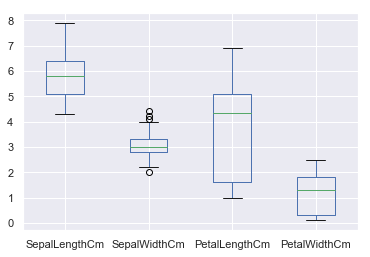

In [84]:
# [4] Tahap Keempat Visualisasi Data
# box and whisker plots
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F9F6EB780>,
      dtype=object)

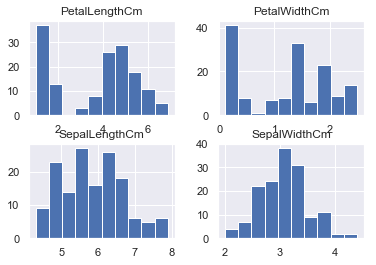

In [85]:
# histograms
dataset.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8636000F0>,
      dtype=object)

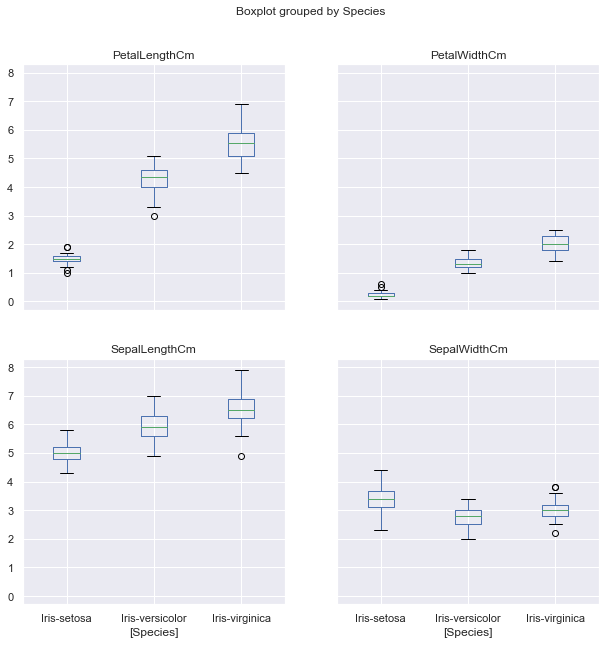

In [59]:
# boxplot pada setiap fitur dibagi berdasarkan spesies
dataset.boxplot(by="Species",figsize=(10,10))

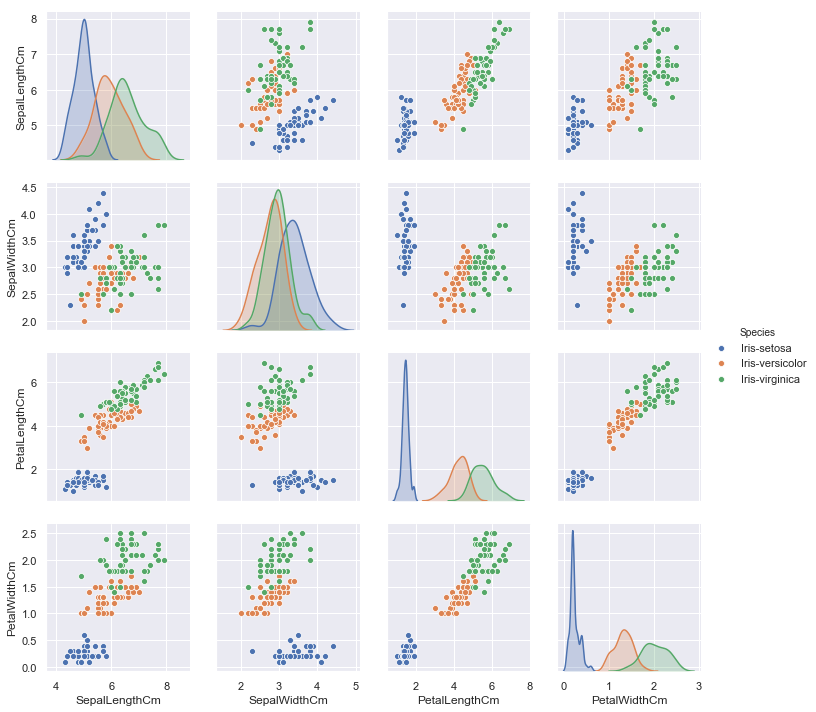

In [86]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="Species")

<p class="tulisan_kiri">[5] Tahap Kelima, Pembagian data training dan data testing.</p>

In [87]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [88]:
X = np.asarray(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [89]:
y = np.asarray(dataset['Species']) 
y [0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [16]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X) 
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7) 
print ('Train set:', X_train.shape, y_train.shape) 
print ('Test set:', X_test.shape, y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


<p class="tulisan_kiri">[6] Tahap Keenam, Analisis Logistic Regression.</p>

In [74]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

<p class="tulisan_kiri">[7] Tahap Ketujuh, Evaluasi Analisis Logistic Regression.</p>

In [77]:
#[7.1] jaccard index  
from sklearn.metrics import jaccard_similarity_score 
jaccard_similarity_score(y_test, y_pred)

0.8666666666666667

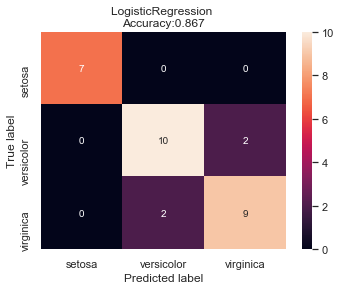

accuracy is 0.8666666666666667


In [78]:
#[7.2] confusion matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

y_pred = classifier.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('accuracy is',accuracy_score(y_pred,y_test))

In [93]:
print (classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

      micro avg       0.87      0.87      0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

